In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.95*maxfil.

Valor máximo: 0.4296875 - Fila: 12
Valor máximo: 0.365234375 - Columna: 104 

2 filas superan el valor de 0.95*max
Dichas filas son: [12, 100] 

6 columnas superan el valor de 0.95*max
Dichas columnas son: [92, 99, 104, 115, 119, 383]


(0.0, 512.0)

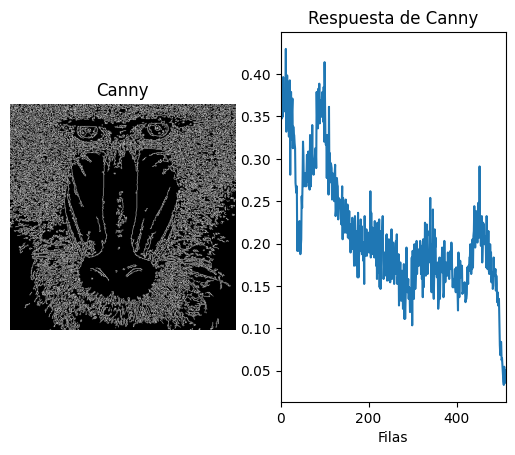

In [10]:
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

row_count = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_count[:, 0] / (255 * canny.shape[0])

col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * canny.shape[1])

# Hallamos en que posición se encuentra el valor máximo
max_rows = np.argmax(rows, axis=0)
max_cols = np.argmax(cols, axis=0)
print("Valor máximo:", rows[max_rows], "- Fila:", max_rows)
print("Valor máximo:", cols[max_cols], "- Columna:", max_cols, "\n")

rows_threshold = 0.95*rows[max_rows]
cols_threshold = 0.95*cols[max_cols]

# Contamos cuantas filas superan el valor de 0.95*max
count = 0
rows_greater_than_threshold = []

for i in range(len(rows)):
    if rows[i] > rows_threshold:
        count += 1
        rows_greater_than_threshold.append(i)

print(count, "filas superan el valor de 0.95*max")
print("Dichas filas son:", rows_greater_than_threshold, "\n")

# Contamos cuantas columnas superan el valor de 0.95*max
count = 0
cols_greater_than_threshold = []

for i in range(len(cols)):
    if cols[i] > cols_threshold:
        count += 1
        cols_greater_than_threshold.append(i)
        
print(count, "columnas superan el valor de 0.95*max")
print("Dichas columnas son:", cols_greater_than_threshold)
        

plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)

plt.xlim([0, canny.shape[0]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

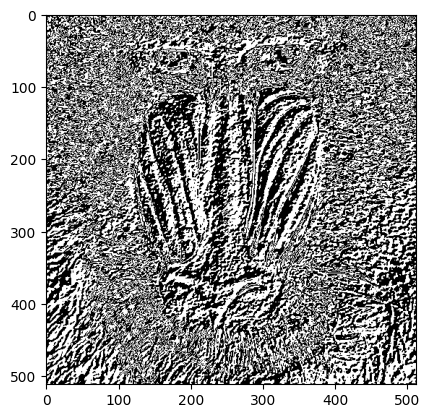

(0.0, 512.0)

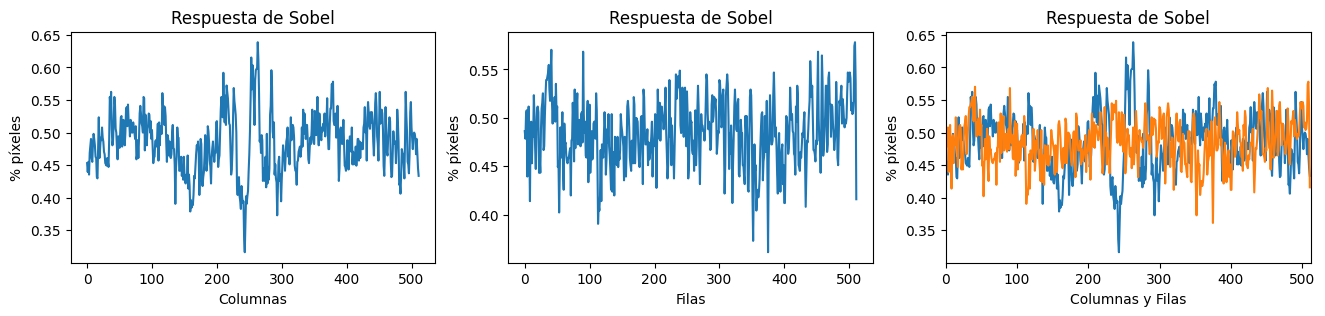

In [7]:
#Lee imagen de archivo
img = cv2.imread('mandril.jpg')
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)
#Se convierte a 8 bits
sobel8 = np.uint8(sobel)

#Define valor umbral
valorUmbral = 130 #Prueba otros valores
#Obtiene imagen umbralizada para dicho valor definido
res, imagenUmbralizada = cv2.threshold(sobel8, valorUmbral, 255, cv2.THRESH_BINARY)
#Muestra resultado
plt.imshow(imagenUmbralizada, cmap='gray') #Visualiza con mapa de color gris
plt.show()

#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
#Suma los valores de los pixeles por fila
rows_counts = cv2.reduce(imagenUmbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])
#El resultado será el número de píxeles blancos por fila
rows = rows_counts[:,0] / (255 * imagenUmbralizada.shape[1])

#Muestra dicha cuenta gráficamente
plt.figure(figsize=(16, 3))
plt.subplot(1, 3, 1)
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)

plt.subplot(1, 3, 2)
plt.title("Respuesta de Sobel")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)

plt.subplot(1, 3, 3)
plt.title("Respuesta de Sobel")
plt.xlabel("Columnas y Filas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, imagenUmbralizada.shape[0]])

TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.

In [14]:
vid = cv2.VideoCapture(0)
mode = 0

while(True):
    ret, frame = vid.read()
    frame_gris = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    if ret:
        if mode == 0:
            cv2.imshow('Normal', frame)
            cv2.setWindowTitle('Normal', 'Normal')
        if mode == 1:
            frame_hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)
            mask = cv2.inRange(frame_hsv, (36, 40, 40), (86, 255, 255))
            frame_in_range = cv2.bitwise_and(frame, frame, mask=mask)
            mask_inv = cv2.bitwise_not(mask)
            background = cv2.bitwise_and(frame_gris, frame_gris, mask=mask_inv)
            background = cv2.merge([background, background, background])
            added_frame = cv2.add(frame_in_range, background)
            cv2.imshow('Normal', added_frame)
            cv2.setWindowTitle('Normal', 'Deteccion de verdes')
        if mode == 2:
            sepia_filter = np.array([[0.272, 0.534, 0.131],
                                     [0.349, 0.686, 0.168],
                                     [0.393, 0.769, 0.189]])
            sepia_frame = cv2.transform(frame, sepia_filter)
            cv2.imshow('Normal', sepia_frame)
            cv2.setWindowTitle('Normal', 'Filtro Sepia')
        if mode == 3:
            frame_gaussian = cv2.GaussianBlur(frame_gris, (3, 3), 0)
            frame_sobelx = cv2.Sobel(frame_gaussian, cv2.CV_64F, 1, 0)  # x
            frame_sobely = cv2.Sobel(frame_gaussian, cv2.CV_64F, 0, 1)  # y
            frame_sobel = cv2.convertScaleAbs(cv2.add(frame_sobelx, frame_sobely))
            _, frame_umbralizado = cv2.threshold(frame_sobel, 130, 255, cv2.THRESH_BINARY)
            cv2.imshow('Normal', frame_umbralizado)
            cv2.setWindowTitle('Normal', 'Umbralizado Sobel')

    key = cv2.waitKey(20)
    
    if key == 13:
        mode = (mode + 1) % 4
    elif key == 27:
        break

vid.release()
cv2.destroyAllWindows()

TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [15]:
# Se definen los colores en HSV
rojo_neon_bajo1 = np.array([0, 150, 150])   # 1º rango bajo para rojo neón
rojo_neon_alto1 = np.array([10, 255, 255])  # 1º rango alto para rojo neón

rojo_neon_bajo2 = np.array([160, 150, 150])  # 2º rango bajo para rojo neón
rojo_neon_alto2 = np.array([180, 255, 255])  # 2º rango alto para rojo neón

verde_neon_bajo = np.array([40, 100, 100]) # rango bajo para verde neón
verde_neon_alto = np.array([70, 255, 255]) # rango alto para verde neón

# Se inicia la captura de vídeo
vid = cv2.VideoCapture(0)

# Lista para almacenar los puntos por donde ha pasado los objetos
trayectoria = []

# Umbral de área mínimo para los objetos
umbral_area_rojo = 500
umbral_area_verde = 1000

while(True):
    ret, frame = vid.read() # fotograma a fotograma
    
    if ret:    
        framem = cv2.flip(frame, 1)                   # Aplica efecto espejo sobre la entrada
        hsv = cv2.cvtColor(framem, cv2.COLOR_BGR2HSV) # Se convierte fotograma a HSV

        # Rango para detectar los colores
        mascara_rojo1 = cv2.inRange(hsv, rojo_neon_bajo1, rojo_neon_alto1)
        mascara_rojo2 = cv2.inRange(hsv, rojo_neon_bajo2, rojo_neon_alto2)
        # Se combinan las máscaras 
        mascara_rojo = cv2.bitwise_or(mascara_rojo1, mascara_rojo2)
        # Gaussiana para suavizar la imagen original, eliminando altas frecuencias
        mascara_rojo = cv2.GaussianBlur(mascara_rojo, (5, 5), 0)
        # Se encuentran los contornos de la máscara
        contornos_rojo, _ = cv2.findContours(mascara_rojo, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Si se detecta algún contorno rojo
        if len(contornos_rojo) > 0:
            contorno_rojo_max = max(contornos_rojo, key=cv2.contourArea) # Se escoge el contorno con mayor área de los objetos rojos
            area_rojo = cv2.contourArea(contorno_rojo_max)              # Se calcula el área del contorno

            if area_rojo > umbral_area_rojo:            # Si el área des mayor que el umbral mínimo
                M_rojo = cv2.moments(contorno_rojo_max) # Se obtiene centro del contorno
                if M_rojo["m00"] > 0:                            # Se verifica el área del contorno
                    cx_rojo = int(M_rojo["m10"] / M_rojo["m00"]) # Coordenada X del centroide
                    cy_rojo = int(M_rojo["m01"] / M_rojo["m00"]) # Coordenada Y del centroide
                    trayectoria.append((cx_rojo, cy_rojo))       # Se agrega coordenadas a trayectoria
                    cv2.circle(framem, (cx_rojo, cy_rojo), 10, (0, 0, 255), 2) # Se dibuja un círculo en el objeto

        # Se pinta la trayectoria del objeto
        for i in range(1, len(trayectoria)):                         # Se recorre lista de trayectoria
            if trayectoria[i - 1] is None or trayectoria[i] is None: # Si aluna coordenada es None (pérdida de intrrrupción)
                continue                                             # continúa
            # Se dibuja en framem, entre 2 coordenadas consecutivas, roja, de grosor 5 píxeles
            cv2.line(framem, trayectoria[i - 1], trayectoria[i], (0, 0, 255), 5)


        # Rango para detectar los colores
        mascara_verde = cv2.inRange(hsv, verde_neon_bajo, verde_neon_alto)
        # Gaussiana para suavizar la imagen original, eliminando altas frecuencias
        mascara_verde = cv2.GaussianBlur(mascara_verde, (5, 5), 0)
        # Se encuentran los contornos de la máscara
        contornos_verde, _ = cv2.findContours(mascara_verde, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Si se detecta algún contorno verde
        if len(contornos_verde) > 0:
            contorno_verde_max = max(contornos_verde, key=cv2.contourArea) # Se escoge el contorno con mayor área de los objetos verdes
            area_verde = cv2.contourArea(contorno_verde_max)              # Se calcula el área del contorno

            if area_verde > umbral_area_verde:            # Si el área des mayor que el umbral mínimo
                M_verde = cv2.moments(contorno_verde_max) # Se obtiene centro del contorno
                if M_verde["m00"] > 0:                            # Se verifica el área del contorno
                    cx_verde = int(M_verde["m10"] / M_verde["m00"])     # Coordenada X del centroide
                    cy_verde = int(M_verde["m01"] / M_verde["m00"])     # Coordenada Y del centroide
                    x, y, w, h = cv2.boundingRect(contorno_verde_max)   # Coordenada X e Y esquina superior izq., ancho, altura
                    cv2.rectangle(framem, (x, y), (x + w, y + h), (0, 255, 0), 2) # Se dibuja un rectángulo en el objeto

                    # Se borra coordenadas de la trayectoria
                    for j in range(len(trayectoria)):                         # Se recorre lista de trayectoria
                        if trayectoria[j] is not None: # Si algún punto NO es None (eliminado anteriormente)
                            # Si la coordenada X del punto rojo está en la anchura del rec. verde y
                            # si la coordeanda Y del punto rojo está en la altura del rec. verde
                            if x <= trayectoria[j][0] <= x + w and y <= trayectoria[j][1] <= y + h:
                                trayectoria[j] = None   # Se marca como None (se elimina el punto rojo)
        
        # Muestra resultado
        cv2.imshow('Rojo pinta y verde borra', framem)

    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break

# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()
